# Parse Text

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def find_team(line):
  match = "/teams/"
  i = 0
  while line[i: i + len(match)] != match:
    i += 1
  
  j = i + len(match)
  while line[j] != '/':
    j += 1
  
  tm = line[i + len(match):j]
  return tm

def find_pct(line):
  match = "\"win_loss_pct\" >"
  i = len(match)
  while line[i - len(match): i] != match:
    i += 1
  
  j = i
  while line[j] != '<':
    j += 1
  return line[i:j]

import urllib.request

start_year = 2013
end_year = 2022
years = [str(i) for i in range(start_year, end_year)]

win_pcts = {}

for year in years:
  url = "https://www.basketball-reference.com/leagues/NBA_{year}_standings.html".format(year=year)
  fp = urllib.request.urlopen(url)
  mybytes = fp.read()

  mystr = mybytes.decode("utf8")
  fp.close()

  start = "<tr class=\"full_table\" ><th scope=\"row\" class=\"left \" data-stat=\"team_name\" ><a href="

  for line in mystr.split("\n"):
    if start in line:
      team, pct = find_team(line), find_pct(line)
      temp = team
      if year <= '2014' and team == 'CHA':
        temp = 'CHO'
      elif year < '2014' and team == 'NOH':
        temp = 'NOP'
      elif year <= '2012' and team == 'NJN':
        temp = 'BRK'
      win_pcts[(temp, year)] = float(pct)

In [ ]:
df = pd.read_csv('nbastats.csv')
df = df.rename(columns={'Unnamed: 1': 'Name'})

col_list = list(df)
col_list[-3], col_list[5] = col_list[5], col_list[-3]
df = df[col_list]
df

,Rk,Name,Age,G,GS,PTS/G,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,MP,TM,YR
0,1,Trae Young,21,60,60,29.6,9.1,20.8,0.437,3.4,9.5,0.361,5.7,11.4,0.501,0.519,8.0,9.3,0.860,0.5,3.7,4.3,9.3,1.1,0.1,4.8,1.7,35.3,ATL,2020
1,2,John Collins,22,41,41,21.6,8.6,14.8,0.583,1.4,3.6,0.401,7.2,11.2,0.642,0.632,2.9,3.7,0.800,2.8,7.3,10.1,1.5,0.8,1.6,1.8,3.4,33.2,ATL,2020
2,3,De'Andre Hunter,22,63,62,12.3,4.4,10.8,0.410,1.7,4.8,0.355,2.7,6.0,0.454,0.489,1.7,2.3,0.764,0.7,3.8,4.5,1.8,0.7,0.3,1.6,2.9,32.0,ATL,2020
3,4,Kevin Huerter,21,56,48,12.2,4.5,10.9,0.413,2.3,6.0,0.380,2.2,4.9,0.453,0.517,0.9,1.1,0.828,0.6,3.4,4.1,3.8,0.9,0.5,1.6,2.5,31.4,ATL,2020
4,5,Cam Reddish,20,58,34,10.5,3.7,9.6,0.384,1.4,4.3,0.332,2.2,5.2,0.428,0.459,1.7,2.2,0.802,0.6,3.1,3.7,1.5,1.1,0.5,1.7,2.3,26.7,ATL,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6724,19,Cartier Martin,26,52,1,4.0,1.4,3.5,0.390,0.8,1.9,0.394,0.6,1.6,0.386,0.497,0.5,0.8,0.700,0.4,1.0,1.4,0.3,0.3,0.1,0.3,1.0,10.4,WAS,2011
6725,20,Hilton Armstrong,26,41,2,1.9,0.8,1.6,0.484,0.0,0.1,0.333,0.7,1.5,0.492,0.492,0.3,0.6,0.609,1.0,1.8,2.8,0.2,0.4,0.4,0.6,1.8,10.0,WAS,2011
6726,21,Mustafa Shakur,26,22,0,2.3,1.0,2.7,0.356,0.0,0.5,0.100,0.9,2.2,0.408,0.364,0.4,0.7,0.533,0.3,0.7,1.0,1.1,0.2,0.1,0.8,0.7,7.2,WAS,2011
6727,22,Lester Hudson,26,11,0,1.6,0.5,2.2,0.250,0.4,1.4,0.267,0.2,0.8,0.222,0.333,0.2,0.4,0.500,0.1,0.4,0.5,1.5,0.4,0.1,0.6,0.9,6.6,WAS,2011


In [ ]:
columns = [col for col in df]
removed = ['Rk', 'Name', 'Age', 'G', 'GS', 'TM', 'YR']
temp = []
for c in columns:
  if c not in removed:
    temp.append(c)
columns = temp
print(columns)

['PTS/G', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'MP']


In [ ]:
cols = columns + ['Name']
player_stats = {}

def to_map(df):
  stats = {}
  for c in cols:
    if c != 'Name':
      stats[c] = float(df[c])
    else:
      stats[c] = str(df.iloc[1])
  
  if (str(df.iloc[-2]), str(df.iloc[-1])) not in player_stats:
    player_stats[str(df.iloc[-2]), str(df.iloc[-1])] = []

  player_stats[str(df.iloc[-2]), str(df.iloc[-1])].append(stats)


df.apply(to_map, axis=1)

print(player_stats[('ATL', '2021')])

cols.remove('Name')

[{'PTS/G': 25.3, 'FG': 7.7, 'FGA': 17.7, 'FG%': 0.43799999999999994, '3P': 2.2, '3PA': 6.3, '3P%': 0.34299999999999997, '2P': 5.6, '2PA': 11.3, '2P%': 0.491, 'eFG%': 0.499, 'FT': 7.7, 'FTA': 8.7, 'FT%': 0.8859999999999999, 'ORB': 0.6, 'DRB': 3.3, 'TRB': 3.9, 'AST': 9.4, 'STL': 0.8, 'BLK': 0.2, 'TOV': 4.1, 'PF': 1.8, 'MP': 33.7, 'Name': 'Trae Young'}, {'PTS/G': 11.9, 'FG': 4.6, 'FGA': 10.6, 'FG%': 0.43200000000000005, '3P': 2.0, '3PA': 5.6, '3P%': 0.363, '2P': 2.6, '2PA': 5.0, '2P%': 0.51, 'eFG%': 0.528, 'FT': 0.7, 'FTA': 0.9, 'FT%': 0.7809999999999999, 'ORB': 0.6, 'DRB': 2.8, 'TRB': 3.3, 'AST': 3.5, 'STL': 1.2, 'BLK': 0.3, 'TOV': 1.1, 'PF': 2.4, 'MP': 30.8, 'Name': 'Kevin Huerter'}, {'PTS/G': 15.2, 'FG': 6.6, 'FGA': 11.0, 'FG%': 0.594, '3P': 0.0, '3PA': 0.0, '3P%': nan, '2P': 6.6, '2PA': 11.0, '2P%': 0.594, 'eFG%': 0.594, 'FT': 2.1, 'FTA': 3.6, 'FT%': 0.573, 'ORB': 4.7, 'DRB': 9.6, 'TRB': 14.3, 'AST': 0.8, 'STL': 0.7, 'BLK': 2.0, 'TOV': 1.2, 'PF': 2.3, 'MP': 30.1, 'Name': 'Clint Capela

In [ ]:
players = 8
stat_data = []
win_results = []
team_year = []

for team, year in player_stats:
  if year <= '2013':
    continue
  stats = player_stats[team, year]

  temp = []
  for d in stats:
    t = []
    for c in columns:
      t.append(np.nan_to_num(d[c]))
    temp.append(t)
  
  temp = sorted(temp, key=lambda x:x[0], reverse=True)
  stat_data.append(temp[:players])
  win_results.append(win_pcts[team, year])
  team_year.append((team, year))

stat_data = np.array(stat_data)
stat_data = np.reshape(stat_data, (len(stat_data), len(stat_data[0]) * len(stat_data[0][0])))
win_results = np.array(win_results)

In [ ]:
df = pd.DataFrame(stat_data)

titles = {}
count = 0
for i in range(1, players + 1):
  for col in columns:
    titles[count] = col + "-" + str(i)
    count += 1

df = df.rename(columns=titles)
print(team_year)
df

[('ATL', '2020'), ('ATL', '2021'), ('BOS', '2020'), ('BOS', '2021'), ('BRK', '2020'), ('BRK', '2021'), ('CHO', '2020'), ('CHO', '2021'), ('CHI', '2020'), ('CHI', '2021'), ('CLE', '2020'), ('CLE', '2021'), ('DAL', '2020'), ('DAL', '2021'), ('DEN', '2020'), ('DEN', '2021'), ('DET', '2020'), ('DET', '2021'), ('GSW', '2020'), ('GSW', '2021'), ('HOU', '2020'), ('HOU', '2021'), ('IND', '2020'), ('IND', '2021'), ('LAC', '2020'), ('LAC', '2021'), ('LAL', '2020'), ('LAL', '2021'), ('MEM', '2020'), ('MEM', '2021'), ('MIA', '2020'), ('MIA', '2021'), ('MIL', '2020'), ('MIL', '2021'), ('MIN', '2020'), ('MIN', '2021'), ('NOP', '2020'), ('NOP', '2021'), ('NYK', '2020'), ('NYK', '2021'), ('OKC', '2020'), ('OKC', '2021'), ('ORL', '2020'), ('ORL', '2021'), ('PHI', '2020'), ('PHI', '2021'), ('PHO', '2020'), ('PHO', '2021'), ('POR', '2020'), ('POR', '2021'), ('SAC', '2020'), ('SAC', '2021'), ('SAS', '2020'), ('SAS', '2021'), ('TOR', '2020'), ('TOR', '2021'), ('UTA', '2020'), ('UTA', '2021'), ('WAS', '2020

,PTS/G-1,FG-1,FGA-1,FG%-1,3P-1,3PA-1,3P%-1,2P-1,2PA-1,2P%-1,eFG%-1,FT-1,FTA-1,FT%-1,ORB-1,DRB-1,TRB-1,AST-1,STL-1,BLK-1,TOV-1,PF-1,MP-1,PTS/G-2,FG-2,FGA-2,FG%-2,3P-2,3PA-2,3P%-2,2P-2,2PA-2,2P%-2,eFG%-2,FT-2,FTA-2,FT%-2,ORB-2,DRB-2,TRB-2,...,3P%-7,2P-7,2PA-7,2P%-7,eFG%-7,FT-7,FTA-7,FT%-7,ORB-7,DRB-7,TRB-7,AST-7,STL-7,BLK-7,TOV-7,PF-7,MP-7,PTS/G-8,FG-8,FGA-8,FG%-8,3P-8,3PA-8,3P%-8,2P-8,2PA-8,2P%-8,eFG%-8,FT-8,FTA-8,FT%-8,ORB-8,DRB-8,TRB-8,AST-8,STL-8,BLK-8,TOV-8,PF-8,MP-8
0,29.6,9.1,20.8,0.437,3.4,9.5,0.361,5.7,11.4,0.501,0.519,8.0,9.3,0.860,0.5,3.7,4.3,9.3,1.1,0.1,4.8,1.7,35.3,21.6,8.6,14.8,0.583,1.4,3.6,0.401,7.2,11.2,0.642,0.632,2.9,3.7,0.800,2.8,7.3,10.1,...,0.250,3.2,5.1,0.627,0.573,1.3,2.0,0.630,1.7,4.0,5.8,1.1,0.5,0.8,1.0,2.3,18.6,8.1,3.3,8.4,0.393,0.8,3.6,0.222,2.5,4.8,0.521,0.440,0.7,0.8,0.875,1.4,6.8,8.2,0.7,1.0,1.5,1.0,4.0,23.3
1,25.3,7.7,17.7,0.438,2.2,6.3,0.343,5.6,11.3,0.491,0.499,7.7,8.7,0.886,0.6,3.3,3.9,9.4,0.8,0.2,4.1,1.8,33.7,17.6,6.8,12.2,0.556,1.3,3.3,0.399,5.5,8.9,0.615,0.610,2.7,3.2,0.833,1.9,5.5,7.4,...,0.363,2.6,5.0,0.510,0.528,0.7,0.9,0.781,0.6,2.8,3.3,3.5,1.2,0.3,1.1,2.4,30.8,11.2,3.7,10.1,0.365,1.3,4.8,0.262,2.4,5.3,0.460,0.428,2.6,3.2,0.817,0.8,3.2,4.0,1.3,1.3,0.3,1.3,2.6,28.8
2,23.4,8.4,18.6,0.450,2.9,7.1,0.403,5.5,11.5,0.480,0.527,3.8,4.7,0.812,1.0,6.0,7.0,3.0,1.4,0.9,2.3,2.1,34.3,20.4,6.8,15.9,0.425,3.2,8.4,0.381,3.5,7.4,0.476,0.526,3.7,4.3,0.864,0.6,3.2,3.9,...,0.143,3.4,5.9,0.581,0.573,1.2,1.7,0.707,2.8,4.6,7.4,1.0,0.4,0.7,1.0,1.7,16.9,6.9,2.3,5.1,0.448,0.5,1.4,0.363,1.8,3.7,0.481,0.499,1.8,1.9,0.926,0.3,1.7,2.0,2.5,0.9,0.2,1.1,1.9,19.3
3,26.4,9.5,20.6,0.459,2.9,7.6,0.386,6.5,13.0,0.502,0.530,4.6,5.3,0.868,0.8,6.6,7.4,4.3,1.2,0.5,2.7,1.9,35.8,24.7,9.3,19.2,0.484,2.8,7.1,0.397,6.5,12.1,0.536,0.558,3.3,4.3,0.764,1.2,4.8,6.0,...,0.000,3.6,4.9,0.727,0.721,0.9,1.4,0.616,2.6,4.3,6.9,1.8,0.8,1.8,1.0,2.0,18.9,7.7,2.8,6.3,0.440,1.5,3.8,0.411,1.2,2.6,0.482,0.562,0.6,0.7,0.889,0.5,1.9,2.4,1.8,0.6,0.1,0.8,1.6,19.2
4,27.4,10.0,20.8,0.478,2.8,7.1,0.394,7.2,13.7,0.522,0.546,4.7,5.1,0.922,1.1,4.1,5.2,6.4,1.4,0.5,2.6,2.7,32.9,20.6,6.6,16.0,0.415,1.9,6.3,0.308,4.7,9.7,0.485,0.476,5.4,7.0,0.778,0.5,3.0,3.5,...,0.000,4.3,6.6,0.658,0.649,2.4,3.9,0.633,3.1,6.5,9.6,1.6,0.6,1.3,1.1,2.3,26.5,10.3,3.6,9.5,0.378,2.0,6.2,0.329,1.5,3.2,0.473,0.486,1.1,1.4,0.805,0.5,3.0,3.5,2.5,0.8,0.5,1.0,1.7,27.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,22.7,8.3,16.8,0.496,0.0,0.1,0.000,8.3,16.7,0.499,0.496,6.1,8.4,0.726,3.1,8.6,11.7,2.9,1.5,1.3,3.5,3.8,32.4,20.3,6.9,15.2,0.453,1.8,5.1,0.349,5.1,10.2,0.504,0.510,4.8,5.7,0.850,0.7,2.3,2.9,...,0.318,1.8,4.2,0.438,0.457,0.9,1.1,0.808,0.8,1.8,2.7,1.0,0.7,0.2,0.8,1.6,24.4,7.1,3.1,6.0,0.506,0.0,0.0,0.000,3.1,6.0,0.506,0.506,1.0,1.8,0.579,1.9,4.6,6.4,0.6,0.4,0.7,1.2,3.1,24.5
236,16.7,6.7,13.4,0.499,0.4,1.0,0.373,6.3,12.5,0.509,0.513,2.9,3.6,0.811,0.3,2.0,2.3,5.7,0.5,0.1,2.2,1.3,29.4,15.1,6.0,12.2,0.490,0.0,0.1,0.000,6.0,12.2,0.493,0.490,3.1,4.3,0.731,2.1,7.6,9.7,...,0.402,3.3,5.9,0.549,0.559,0.9,1.2,0.739,0.9,3.2,4.1,2.8,0.6,0.4,1.5,1.8,25.0,9.1,3.2,7.4,0.432,1.9,4.7,0.415,1.3,2.8,0.460,0.562,0.7,0.9,0.794,0.4,3.0,3.4,1.5,1.0,0.9,1.1,1.6,24.3
237,22.7,7.6,17.8,0.429,0.8,2.7,0.305,6.8,15.2,0.451,0.452,6.6,8.0,0.824,0.6,3.7,4.3,4.0,1.1,0.4,2.2,2.5,38.2,19.4,7.2,18.6,0.388,1.2,3.3,0.373,6.0,15.3,0.391,0.421,3.8,4.9,0.773,1.6,5.8,7.4,...,0.389,2.0,4.4,0.442,0.509,1.1,1.2,0.855,0.2,2.0,2.3,3.7,0.4,0.1,1.7,1.7,21.5,9.1,3.6,7.6,0.477,1.0,2.3,0.411,2.7,5.3,0.506,0.540,0.9,1.1,0.745,1.7,3.3,5.1,1.3,0.9,0.7,1.0,2.5,23.3
238,16.2,5.5,13.4,0.413,1.1,3.6,0.304,4.4,9.8,0.453,0.454,4.0,4.9,0.816,0.8,4.3,5.1,5.2,1.4,0.5,2.8,2.0,36.4,14.0,4.9,10.7,0.457,0.6,1.8,0.350,4.2,8.8,0.480,0.487,3.6,4.8,0.748,0.8,2.5,3.3,...,0.359,2.2,4

# Prep Data (Unsupervised)

In [ ]:
df_titles = [c for c in df]
relation_pairs = []

for i in range(len(df_titles)):
  for j in range(i + 1, len(df_titles)):
    corr = df[[df_titles[i], df_titles[j]]].corr()
    r = corr.iloc[0].iloc[1]
    if r > 0.8:
      relation_pairs.append((df_titles[i], df_titles[j], r))

print(relation_pairs)

[('PTS/G-1', 'FG-1', 0.8825892680382939), ('PTS/G-1', 'FGA-1', 0.8787862250535792), ('FG-1', 'FGA-1', 0.8644495064292896), ('FG%-1', '2P%-1', 0.8699999637442577), ('3P-1', '3PA-1', 0.9824630595519586), ('2P-1', '2PA-1', 0.9300294906900421), ('2P%-1', 'eFG%-1', 0.8364663848319654), ('FT-1', 'FTA-1', 0.9695540920698461), ('ORB-1', 'TRB-1', 0.831934192524797), ('DRB-1', 'TRB-1', 0.9776093926620802), ('PTS/G-2', 'FG-2', 0.910564192312553), ('PTS/G-2', 'FGA-2', 0.8396330462015467), ('FG-2', 'FGA-2', 0.826108796499242), ('FG%-2', '2P%-2', 0.8404972410752136), ('3P-2', '3PA-2', 0.9777202132415841), ('2P-2', '2PA-2', 0.9325447896632689), ('2P%-2', 'eFG%-2', 0.812369165684209), ('FT-2', 'FTA-2', 0.9323497495186452), ('ORB-2', 'TRB-2', 0.8763070856433356), ('DRB-2', 'TRB-2', 0.9773573154291072), ('PTS/G-3', 'FG-3', 0.8524469762984934), ('PTS/G-3', 'FGA-3', 0.8363834398379996), ('FG%-3', '2P%-3', 0.8745395280575474), ('3P-3', '3PA-3', 0.9811995836861059), ('2P-3', '2PA-3', 0.9475250370389583), ('

In [ ]:
sim_fields = {}
for r in relation_pairs:
  num1 = int(r[0].split('-')[1])
  num2 = int(r[1].split('-')[1])
  if num1 != num2:
    print(r)
  field1 = r[0].split('-')[0]
  field2 = r[1].split('-')[0]
  if num1 not in sim_fields:
    sim_fields[num1] = []
  sim_fields[num1].append((field1, field2))

for k in sim_fields:
  print(sim_fields[k])

('PTS/G-6', 'PTS/G-7', 0.8283183590386717)
('PTS/G-7', 'PTS/G-8', 0.8866844293129631)
('PTS/G-7', 'FG-8', 0.8016585633886285)
[('PTS/G', 'FG'), ('PTS/G', 'FGA'), ('FG', 'FGA'), ('FG%', '2P%'), ('3P', '3PA'), ('2P', '2PA'), ('2P%', 'eFG%'), ('FT', 'FTA'), ('ORB', 'TRB'), ('DRB', 'TRB')]
[('PTS/G', 'FG'), ('PTS/G', 'FGA'), ('FG', 'FGA'), ('FG%', '2P%'), ('3P', '3PA'), ('2P', '2PA'), ('2P%', 'eFG%'), ('FT', 'FTA'), ('ORB', 'TRB'), ('DRB', 'TRB')]
[('PTS/G', 'FG'), ('PTS/G', 'FGA'), ('FG%', '2P%'), ('3P', '3PA'), ('2P', '2PA'), ('2P%', 'eFG%'), ('FT', 'FTA'), ('ORB', 'DRB'), ('ORB', 'TRB'), ('DRB', 'TRB')]
[('PTS/G', 'FG'), ('PTS/G', 'FGA'), ('FG%', '2P%'), ('3P', '3PA'), ('2P', '2PA'), ('FT', 'FTA'), ('ORB', 'TRB'), ('DRB', 'TRB')]
[('PTS/G', 'FG'), ('FG%', '2P%'), ('3P', '3PA'), ('2P', '2PA'), ('FT', 'FTA'), ('ORB', 'TRB'), ('DRB', 'TRB')]
[('PTS/G', 'FG'), ('PTS/G', 'FGA'), ('PTS/G', 'PTS/G'), ('FG%', '2P%'), ('FG%', 'eFG%'), ('3P', '3PA'), ('2P', '2PA'), ('2P%', 'eFG%'), ('FT', 'FTA'),

In [ ]:
removed = ['FGA', 'FG', '3P', '2P', 'eFG%', 'FT', 'DRB', 'ORB','PF']
new_columns = []
for i in range(1, players + 1):
  for c in columns:
    if c not in removed:
        new_columns.append(c + "-" + str(i))

parsed_df = df[new_columns]
parsed_df

,PTS/G-1,FG%-1,3PA-1,3P%-1,2PA-1,2P%-1,FTA-1,FT%-1,TRB-1,AST-1,STL-1,BLK-1,TOV-1,MP-1,PTS/G-2,FG%-2,3PA-2,3P%-2,2PA-2,2P%-2,FTA-2,FT%-2,TRB-2,AST-2,STL-2,BLK-2,TOV-2,MP-2,PTS/G-3,FG%-3,3PA-3,3P%-3,2PA-3,2P%-3,FTA-3,FT%-3,TRB-3,AST-3,STL-3,BLK-3,...,3PA-6,3P%-6,2PA-6,2P%-6,FTA-6,FT%-6,TRB-6,AST-6,STL-6,BLK-6,TOV-6,MP-6,PTS/G-7,FG%-7,3PA-7,3P%-7,2PA-7,2P%-7,FTA-7,FT%-7,TRB-7,AST-7,STL-7,BLK-7,TOV-7,MP-7,PTS/G-8,FG%-8,3PA-8,3P%-8,2PA-8,2P%-8,FTA-8,FT%-8,TRB-8,AST-8,STL-8,BLK-8,TOV-8,MP-8
0,29.6,0.437,9.5,0.361,11.4,0.501,9.3,0.860,4.3,9.3,1.1,0.1,4.8,35.3,21.6,0.583,3.6,0.401,11.2,0.642,3.7,0.800,10.1,1.5,0.8,1.6,1.8,33.2,15.0,0.504,3.6,0.270,8.7,0.601,2.3,0.736,6.0,1.8,1.3,0.5,...,4.3,0.332,5.2,0.428,2.2,0.802,3.7,1.5,1.1,0.5,1.7,26.7,8.7,0.546,1.4,0.250,5.1,0.627,2.0,0.630,5.8,1.1,0.5,0.8,1.0,18.6,8.1,0.393,3.6,0.222,4.8,0.521,0.8,0.875,8.2,0.7,1.0,1.5,1.0,23.3
1,25.3,0.438,6.3,0.343,11.3,0.491,8.7,0.886,3.9,9.4,0.8,0.2,4.1,33.7,17.6,0.556,3.3,0.399,8.9,0.615,3.2,0.833,7.4,1.2,0.5,1.0,1.3,29.3,16.4,0.473,7.6,0.438,5.3,0.522,1.0,0.909,3.6,3.3,1.1,0.3,...,5.0,0.406,4.3,0.466,3.4,0.925,4.1,1.5,0.6,0.2,0.8,24.0,11.9,0.432,5.6,0.363,5.0,0.510,0.9,0.781,3.3,3.5,1.2,0.3,1.1,30.8,11.2,0.365,4.8,0.262,5.3,0.460,3.2,0.817,4.0,1.3,1.3,0.3,1.3,28.8
2,23.4,0.450,7.1,0.403,11.5,0.480,4.7,0.812,7.0,3.0,1.4,0.9,2.3,34.3,20.4,0.425,8.4,0.381,7.4,0.476,4.3,0.864,3.9,4.8,0.9,0.5,2.1,31.1,20.3,0.481,5.9,0.382,9.6,0.543,4.3,0.724,6.4,2.1,1.1,0.4,...,1.5,0.333,5.1,0.633,1.8,0.763,6.6,1.7,0.6,1.3,0.8,24.1,8.1,0.572,0.1,0.143,5.9,0.581,1.7,0.707,7.4,1.0,0.4,0.7,1.0,16.9,6.9,0.448,1.4,0.363,3.7,0.481,1.9,0.926,2.0,2.5,0.9,0.2,1.1,19.3
3,26.4,0.459,7.6,0.386,13.0,0.502,5.3,0.868,7.4,4.3,1.2,0.5,2.7,35.8,24.7,0.484,7.1,0.397,12.1,0.536,4.3,0.764,6.0,3.4,1.2,0.6,2.7,34.5,19.3,0.420,8.2,0.360,7.5,0.486,3.5,0.899,4.0,4.9,1.1,0.3,...,2.3,0.347,4.6,0.653,1.6,0.687,5.2,1.6,0.6,1.0,1.0,24.5,8.0,0.721,0.0,0.000,4.9,0.727,1.4,0.616,6.9,1.8,0.8,1.8,1.0,18.9,7.7,0.440,3.8,0.411,2.6,0.482,0.7,0.889,2.4,1.8,0.6,0.1,0.8,19.2
4,27.4,0.478,7.1,0.394,13.7,0.522,5.1,0.922,5.2,6.4,1.4,0.5,2.6,32.9,20.6,0.415,6.3,0.308,9.7,0.485,7.0,0.778,3.5,6.8,0.6,0.3,2.7,31.2,18.7,0.425,4.9,0.364,11.4,0.451,4.4,0.711,4.2,4.4,1.2,0.2,...,4.5,0.389,5.4,0.419,2.3,1.000,3.0,3.0,0.5,0.1,0.6,24.3,11.1,0.649,0.1,0.000,6.6,0.658,3.9,0.633,9.6,1.6,0.6,1.3,1.1,26.5,10.3,0.378,6.2,0.329,3.2,0.473,1.4,0.805,3.5,2.5,0.8,0.5,1.0,27.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,22.7,0.496,0.1,0.000,16.7,0.499,8.4,0.726,11.7,2.9,1.5,1.3,3.5,32.4,20.3,0.453,5.1,0.349,10.2,0.504,5.7,0.850,2.9,6.3,1.3,0.1,3.0,34.7,20.1,0.482,2.5,0.312,12.8,0.516,5.4,0.836,5.5,3.1,1.2,0.6,...,1.3,0.286,5.1,0.474,3.6,0.708,4.4,0.8,0.7,0.2,1.0,24.7,8.3,0.381,3.9,0.318,4.2,0.438,1.1,0.808,2.7,1.0,0.7,0.2,0.8,24.4,7.1,0.506,0.0,0.000,6.0,0.506,1.8,0.579,6.4,0.6,0.4,0.7,1.2,24.5
236,16.7,0.499,1.0,0.373,12.5,0.509,3.6,0.811,2.3,5.7,0.5,0.1,2.2,29.4,15.1,0.490,0.1,0.000,12.2,0.493,4.3,0.731,9.7,3.0,0.6,1.9,2.1,29.2,12.8,0.522,2.8,0.379,7.0,0.579,1.9,0.802,6.2,2.0,1.7,0.8,...,3.9,0.425,4.3,0.500,1.0,0.890,2.1,1.8,0.8,0.1,0.8,18.9,9.1,0.521,1.4,0.402,5.9,0.549,1.2,0.739,4.1,2.8,0.6,0.4,1.5,25.0,9.1,0.432,4.7,0.415,2.8,0.460,0.9,0.794,3.4,1.5,1.0,0.9,1.1,24.3
237,22.7,0.429,2.7,0.305,15.2,0.451,8.0,0.824,4.3,4.0,1.1,0.4,2.2,38.2,19.4,0.388,3.3,0.373,15.3,0.391,4.9,0.773,7.4,2.2,1.6,1.3,3.3,35.5,17.9,0.423,6.3,0.380,7.3,0.460,4.9,0.813,4.7,7.4,1.5,0.2,...,0.9,0.303,7.1,0.593,1.9,0.636,6.6,1.5,0.7,1.1,1.6,28.8,9.5,0.417,3.9,0.389,4.4,0.442,1.2,0.855,2.3,3.7,0.4,0.1,1.7,21.5,9.1,0.477,2.3,0.411,5.3,0.506,1.1,0.745,5.1,1.3,0.9,0.7,1.0,23.3
238,16.2,0.413,3.6,0.304,9.8,0.453,4.9,0.816,5.1,5.2,1.4,0.5,2.8,36.4,14.0,0.457,1.8,0.350,8.8,0.480,4.8,0.748,3.3,

In [ ]:
X = parsed_df.to_numpy()

def avg_and_std(X):
  return np.average(X, axis=0), np.std(X, axis=0)

def normalize(X, avgs, stds):
  copy = np.array(X)
  for i in range(len(X)):
    for j in range(len(stds)):
      copy[i][j] = (X[i][j] - avgs[j]) / stds[j]

  return copy

avgs, stds = avg_and_std(X)
X_scale = normalize(X, avgs, stds)
np.average(X, axis=0)

array([22.6125    ,  0.46825   ,  4.82708333,  0.3461875 , 12.23708333,
        0.50702917,  5.95125   ,  0.8181625 ,  6.35      ,  4.84416667,
        1.17625   ,  0.64208333,  2.71166667, 33.88125   , 18.25625   ,
        0.46114167,  4.485     ,  0.33982917, 10.08416667,  0.50012083,
        4.06958333,  0.79976667,  5.73541667,  3.92916667,  1.0525    ,
        0.58916667,  2.22416667, 32.12291667, 15.37875   ,  0.46627917,
        3.83875   ,  0.33007917,  8.54208333,  0.505625  ,  3.23958333,
        0.78214167,  5.53375   ,  2.97875   ,  0.95875   ,  0.58625   ,
        1.8575    , 30.32916667, 13.28291667,  0.46304167,  3.56083333,
        0.3213625 ,  7.15666667,  0.50249583,  2.77291667,  0.77910417,
        5.14958333,  2.76583333,  0.86291667,  0.55083333,  1.65375   ,
       28.54958333, 11.7975    ,  0.46092917,  3.22416667,  0.3234125 ,
        6.50958333,  0.50274167,  2.3375    ,  0.753725  ,  4.73791667,
        2.515     ,  0.84375   ,  0.5225    ,  1.4875    , 27.04

# KMeans

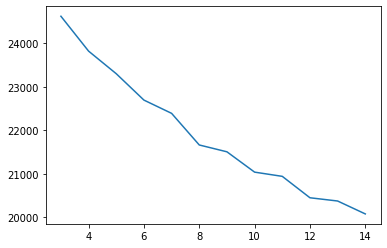

In [ ]:
from sklearn.cluster import KMeans

dists = []

for size in range(3, 15):
  kmeans = KMeans(n_clusters=size).fit(X_scale)
  dists.append(kmeans.inertia_)

x = np.linspace(3, 14, 12)
y = np.array(dists)
plt.plot(x, y)
plt.show()

In [ ]:
pip install pyclustertend

In [ ]:
from pyclustertend import hopkins
from pyclustertend.metric import assess_tendency_by_mean_metric_score

assess_tendency_by_mean_metric_score(X_scale, random_state=2021)

5.0

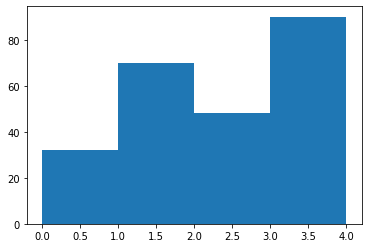

In [ ]:
n_clusters = 5

kmeans = KMeans(n_clusters=n_clusters, max_iter=400, random_state=2021, algorithm='full')
labels = kmeans.fit_predict(X_scale)

plt.hist(labels, bins=4)
plt.show()

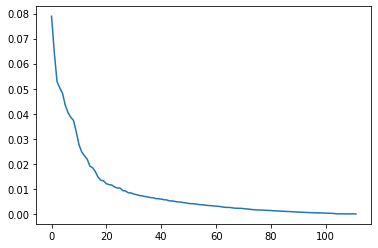

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
X_trans = pca.fit_transform(X_scale)

plt.plot(pca.explained_variance_ratio_)
plt.show()

In [ ]:
clusters = {}
team_clusters = {}
for i in range(n_clusters):
  clusters[i] = []
  team_clusters[i] = []

for i in range(len(X_scale)):
  clusters[labels[i]].append(X[i])
  team_clusters[labels[i]].append(team_year[i])

for i in range(n_clusters):
  clusters[i] = np.array(clusters[i])

In [ ]:
averaged = []

for i in range(n_clusters):
  averaged.append(np.average(clusters[i], axis=0))

averaged = np.array(averaged)

convert = pd.DataFrame(np.array(averaged))

map = {}
for i in range(len(new_columns)):
  map[i] = new_columns[i]

convert = convert.rename(columns=map)
convert

,PTS/G-1,FG%-1,3PA-1,3P%-1,2PA-1,2P%-1,FTA-1,FT%-1,TRB-1,AST-1,STL-1,BLK-1,TOV-1,MP-1,PTS/G-2,FG%-2,3PA-2,3P%-2,2PA-2,2P%-2,FTA-2,FT%-2,TRB-2,AST-2,STL-2,BLK-2,TOV-2,MP-2,PTS/G-3,FG%-3,3PA-3,3P%-3,2PA-3,2P%-3,FTA-3,FT%-3,TRB-3,AST-3,STL-3,BLK-3,...,3PA-6,3P%-6,2PA-6,2P%-6,FTA-6,FT%-6,TRB-6,AST-6,STL-6,BLK-6,TOV-6,MP-6,PTS/G-7,FG%-7,3PA-7,3P%-7,2PA-7,2P%-7,FTA-7,FT%-7,TRB-7,AST-7,STL-7,BLK-7,TOV-7,MP-7,PTS/G-8,FG%-8,3PA-8,3P%-8,2PA-8,2P%-8,FTA-8,FT%-8,TRB-8,AST-8,STL-8,BLK-8,TOV-8,MP-8
0,24.396875,0.451750,5.784375,0.350031,12.728125,0.496344,6.825000,0.820156,5.731250,6.350000,1.250000,0.400000,3.118750,34.878125,18.481250,0.450219,5.040625,0.343250,9.993750,0.489438,3.856250,0.804750,5.634375,3.818750,1.078125,0.593750,2.234375,32.243750,15.503125,0.454750,4.271875,0.343344,8.131250,0.498281,3.403125,0.801719,5.059375,2.771875,0.865625,0.493750,...,3.803125,0.343781,5.025000,0.498594,2.009375,0.738062,4.200000,2.471875,0.875000,0.493750,1.331250,27.406250,9.278125,0.445688,3.425000,0.349094,4.303125,0.496438,1.471875,0.790406,3.571875,1.975000,0.781250,0.359375,1.131250,23.990625,8.353125,0.431844,3.050000,0.327031,4.271875,0.496000,1.412500,0.736625,3.606250,2.071875,0.831250,0.340625,1.081250,23.975000
1,23.502857,0.499729,3.078571,0.305529,14.235714,0.531657,6.472857,0.796671,8.392857,4.355714,1.128571,0.994286,2.672857,34.165714,19.194286,0.456229,4.802857,0.365757,10.410000,0.493771,4.260000,0.826500,5.492857,4.910000,1.220000,0.491429,2.407143,33.140000,15.361429,0.476000,3.818571,0.330900,8.312857,0.516029,3.144286,0.797614,5.315714,3.128571,0.974286,0.614286,...,2.680000,0.308700,5.254286,0.509471,1.731429,0.759986,4.291429,2.112857,0.752857,0.474286,1.178571,24.194286,8.257143,0.446029,2.795714,0.326486,4.172857,0.499214,1.425714,0.756600,3.357143,1.708571,0.650000,0.320000,0.974286,21.968571,7.481429,0.455271,2.220000,0.321057,3.994286,0.496657,1.407143,0.751157,3.248571,1.681429,0.590000,0.354286,0.945714,20.204286
2,20.379167,0.444271,5.175000,0.364750,10.725000,0.479354,5.204167,0.832167,4.810417,4.466667,1.258333,0.445833,2.427083,33.841667,16.516667,0.450292,3.695833,0.337104,9.979167,0.481958,3.664583,0.795417,5.054167,3.525000,0.981250,0.522917,2.133333,31.637500,13.908333,0.450271,3.381250,0.317271,8.318750,0.483292,2.872917,0.769042,5.206250,2.591667,0.922917,0.491667,...,2.843750,0.304438,5.520833,0.487083,2.085417,0.755646,3.854167,2.260417,0.760417,0.358333,1.302083,24.077083,9.200000,0.440354,2.475000,0.292354,5.347917,0.474687,1.920833,0.785479,4.108333,2.410417,0.743750,0.400000,1.339583,23.881250,8.045833,0.514833,0.656250,0.150771,5.664583,0.538271,2.041667,0.694333,5.660417,1.614583,0.697917,0.731250,1.168750,21.485417
3,21.457971,0.461319,5.194203,0.363391,11.320290,0.502841,5.233333,0.820565,5.885507,4.597101,1.078261,0.592754,2.595652,32.788406,17.981159,0.454333,5.011594,0.339000,9.491304,0.503246,3.817391,0.800638,5.378261,3.549275,0.947826,0.515942,2.055072,31.259420,16.175362,0.473362,3.631884,0.320768,9.302899,0.510681,3.650725,0.762304,6.462319,3.173913,0.989855,0.694203,...,3.156522,0.338957,6.476812,0.514188,2.431884,0.781522,5.085507,2.563768,0.902899,0.559420,1.446377,27.424638,10.821739,0.466536,3.086957,0.297899,5.627536,0.515652,2.334783,0.747377,5.188406,2.378261,0.791304,0.553623,1.447826,25.547826,9.820290,0.437130,3.618841,0.354768,4.594203,0.488899,1.817391,0.784696,3.926087,2.252174,0.830435,0.407246,1.266667,24.730435
4,25.823810,0.466048,7.195238,0.376905,11.295238,0.518238,6.947619,0.846857,5.528571,5.852381,1.357143,0.447619,3.252381,35.095238,19.666667,0.541333,2.652381,0.257143,11.323810,0.568810,5.514286,0.710143,9.428571,3.000000,0.961905,1.300000,2.361905,32.495238,15.990476,0.464762,4.971429,0.367000,7.942857,0.516571,2.795238,0.795857,4.680952,3.038095,1.028571,0.495238,...,3.157143,0.341810,4.580952,0.531667,1.642857,0.762952,3.823810,1.676190,0.733333,0.457143,1.038095,22.733333,8.366667,0.546905,1.304762,0.225810,4.847619,0.576095,1.909524,0.650095,5.261905,1.414

# Interpret

In [ ]:
cluster_to_letter = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E'}

In [ ]:
unnumber_columns = []
for i in range(len(new_columns)):
  c = new_columns[i].split("-")[0]
  if c not in unnumber_columns:
    unnumber_columns.append(c)

## Best Player

Cluster 2: Best player is a high-scoring guard who is very efficient

Cluster 3: Best player is a high-scoring guard who gets to FT line and passes a lot

Cluster 4: Paint presence player

In [ ]:
player = 1
display = [c + "-" + str(player) for c in unnumber_columns]

convert[display]

,PTS/G-1,FG%-1,3PA-1,3P%-1,2PA-1,2P%-1,FTA-1,FT%-1,TRB-1,AST-1,STL-1,BLK-1,TOV-1,MP-1
0,24.396875,0.451750,5.784375,0.350031,12.728125,0.496344,6.825000,0.820156,5.731250,6.350000,1.250000,0.400000,3.118750,34.878125
1,23.502857,0.499729,3.078571,0.305529,14.235714,0.531657,6.472857,0.796671,8.392857,4.355714,1.128571,0.994286,2.672857,34.165714
2,20.379167,0.444271,5.175000,0.364750,10.725000,0.479354,5.204167,0.832167,4.810417,4.466667,1.258333,0.445833,2.427083,33.841667
3,21.457971,0.461319,5.194203,0.363391,11.320290,0.502841,5.233333,0.820565,5.885507,4.597101,1.078261,0.592754,2.595652,32.788406
4,25.823810,0.466048,7.195238,0.376905,11.295238,0.518238,6.947619,0.846857,5.528571,5.852381,1.357143,0.447619,3.252381,35.095238


In [ ]:
def big_bar(pl, averaged, avgs, stds, title):
  grouped = {}
  for i in range(n_clusters):
    grouped[i] = []

  averaging = (averaged - avgs) / stds
  averaging = averaging[:, (pl - 1) * len(unnumber_columns) : pl * len(unnumber_columns)]

  barWidth = 0.2

  rs = []
  for i in range(n_clusters):
    rs.append([barWidth * (i + (n_clusters + 2) * j) for j in range(len(unnumber_columns))])

  f = plt.figure()
  f.set_figwidth(12)

  for i in range(n_clusters):
    plt.bar(rs[i], averaging[i], label=cluster_to_letter[i], width=barWidth)

  plt.xticks(rs[n_clusters // 2], unnumber_columns)
  plt.title(title)
  plt.legend()
  plt.show()

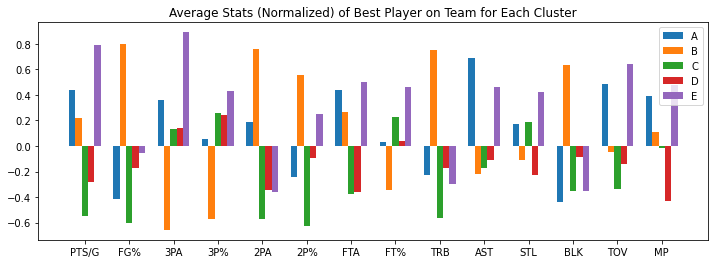

In [ ]:
big_bar(1, averaged, avgs, stds, 'Average Stats (Normalized) of Best Player on Team for Each Cluster')

In [ ]:
def two_plot(f1, f2, pl, clusters):
  x_i = unnumber_columns.index(f1) + len(unnumber_columns) * (pl - 1)
  y_i = unnumber_columns.index(f2) + len(unnumber_columns) * (pl - 1)

  pts = []
  for i in range(n_clusters):
    pts.append([])
  for i in range(len(X)):
    pts[labels[i]].append([X[i][x_i], X[i][y_i]])

  for i in clusters:
    plt.scatter([p[0] for p in pts[i]], [p[1] for p in pts[i]], label=i)

  plt.legend()
  plt.xlabel(f1)
  plt.ylabel(f2)
  plt.title('{f1} vs. {f2} for Player {pl}'.format(f1=f1, f2=f2, pl=pl))
  plt.show()

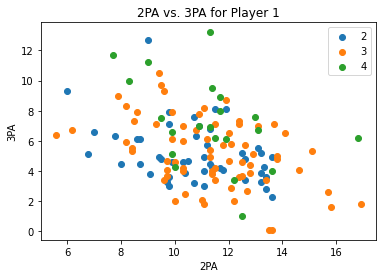

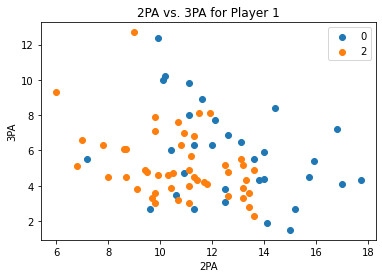

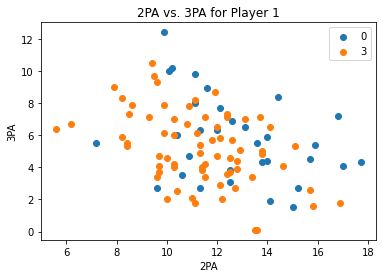

In [ ]:
two_plot('2PA', '3PA', 1, [2, 3, 4])
two_plot('2PA', '3PA', 1, [0, 2])
two_plot('2PA', '3PA', 1, [0, 3])

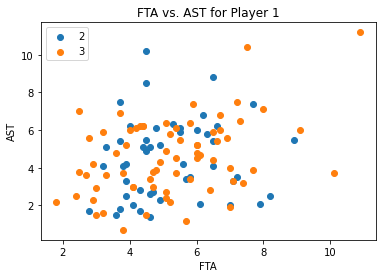

In [ ]:
two_plot('FTA', 'AST', 1, [2, 3])

## Second Best Player

Cluster 1 and 2: Have similar stats as best player. Guard

In [ ]:
player = 2
display = [c + "-" + str(player) for c in unnumber_columns]

convert[display]

,PTS/G-2,FG%-2,3PA-2,3P%-2,2PA-2,2P%-2,FTA-2,FT%-2,TRB-2,AST-2,STL-2,BLK-2,TOV-2,MP-2
0,18.481250,0.450219,5.040625,0.343250,9.993750,0.489438,3.856250,0.804750,5.634375,3.818750,1.078125,0.593750,2.234375,32.243750
1,19.194286,0.456229,4.802857,0.365757,10.410000,0.493771,4.260000,0.826500,5.492857,4.910000,1.220000,0.491429,2.407143,33.140000
2,16.516667,0.450292,3.695833,0.337104,9.979167,0.481958,3.664583,0.795417,5.054167,3.525000,0.981250,0.522917,2.133333,31.637500
3,17.981159,0.454333,5.011594,0.339000,9.491304,0.503246,3.817391,0.800638,5.378261,3.549275,0.947826,0.515942,2.055072,31.259420
4,19.666667,0.541333,2.652381,0.257143,11.323810,0.568810,5.514286,0.710143,9.428571,3.000000,0.961905,1.300000,2.361905,32.495238


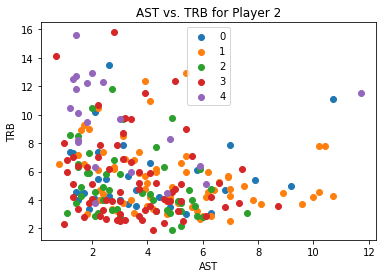

In [ ]:
two_plot('AST', 'TRB', 2, [0, 1, 2, 3, 4])

## Points over spot

In [ ]:
def team_dist(f, clusters):
  index = unnumber_columns.index(f)
  for i in clusters:
    plt.plot(averaged[i][[len(unnumber_columns) * i + index for i in range(players)]], label=i)
  plt.legend()
  plt.show()

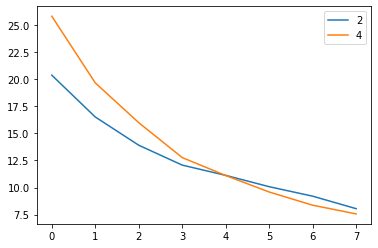

In [ ]:
team_dist('PTS/G', [2, 4])

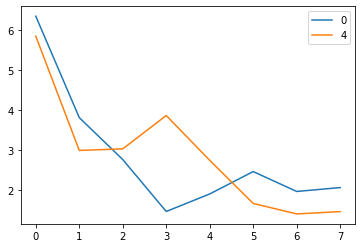

In [ ]:
team_dist('AST', [0, 4])

## Win Percents

In [ ]:
cluster_win_pcts = {}
for k in team_clusters:
  cluster_win_pcts[k] = np.average([win_pcts[i] for i in team_clusters[k]])
cluster_win_pcts

{0: 0.49865625,
 1: 0.5570714285714286,
 2: 0.4633749999999999,
 3: 0.43921739130434784,
 4: 0.5879047619047619}

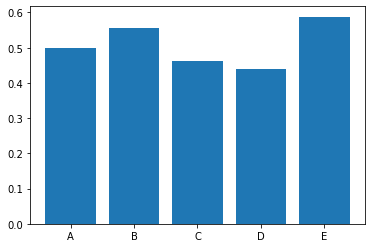

In [ ]:
cluster_labels = [cluster_to_letter[i] for i in range(5)]
cluster_wins = [cluster_win_pcts[i] for i in range(5)]
plt.bar(cluster_labels, cluster_wins)
plt.title()
plt.show()